# Script Modulação AM-DSB

Suponha que você tem um sinal de áudio de frequência de $1 kHz$ e uma portadora de $500 kHz$. A amplitude máxima do sinal de áudio é de 2 volts e a amplitude da portadora é de 5 volts. Realize a modulação AM DSB desse sinal de áudio na portadora e responda às seguintes perguntas:

  * Qual é a frequência da onda modulada?
  * Qual é a amplitude máxima da onda modulada?
  * Calcule o índice de modulação.
  * Determine a potência do sinal modulante e do sinal modulado, considerando que ambos têm uma resistência de carga de $50 \Omega$.

---

# Installs / imports

In [25]:
%pip install -q numpy matplotlib scipy


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift

# Portado das referências

In [ ]:
def plot_fft(Ts, signal, fmin, fmax, plot_args, x_ticks=5):
    """
    Plots the magnitude spectrum (FFT) of a given time-domain signal.

    Parameters:
    ----------
    Ts : float
        Sampling period (time between samples) in seconds. Defines the time resolution
        and determines the maximum frequency represented in the spectrum.

    signal : numpy.ndarray
        Input signal in the time domain to be transformed into the frequency domain.

    fmin : float
        Minimum frequency (Hz) to display on the x-axis of the plot.

    fmax : float
        Maximum frequency (Hz) to display on the x-axis of the plot.

    plot_args : str or dict
        Arguments passed to matplotlib's plot function for customizing the appearance
        (e.g., color, line style).

    """

    # Zero-padding
    signal = np.concatenate((signal, np.zeros(int(1e6))))

    # FFT and normalize
    ftt = fftshift(np.abs(fft(signal)) / len(signal))

    # Frequency axis
    f = np.linspace(-0.5 / Ts, 0.5 / Ts, len(ftt))

    plt.plot(f, ftt, plot_args)
    plt.axis([fmin, fmax, 0, 1.1 * np.max(ftt)])

    # Set x-axis ticks every X Hz
    tick_step = (fmax - fmin) / 5
    plt.xticks(np.arange(fmin, fmax + tick_step, tick_step))


# Parâmetros / Sinais

In [28]:
# Observation time window in seconds
Tw = 0.001
# Sampling period in seconds
Ts = 1e-8

# Frequency of the carrier signal in Hz
Fc = 500e3
# Amplitude of the carrier signal
Ac = 5

# Frequency of the modulating signal in Hz
Fm = 1e3
# Amplitude of the modulating signal
Am = 2

# Generate time vector for the observation window
t = np.arange(0, Tw, Ts)

# Signals, carrier and modulating
ct = Ac * np.cos(2 * np.pi * Fc * t)
mt = Am * np.cos(2 * np.pi * Fm * t)
# Assuming modulation index as 1 / Ac so it is a normalized value
k = 1 / Ac

# Modulated signal (AM)
st = (1 + k * mt) * ct

# Plots

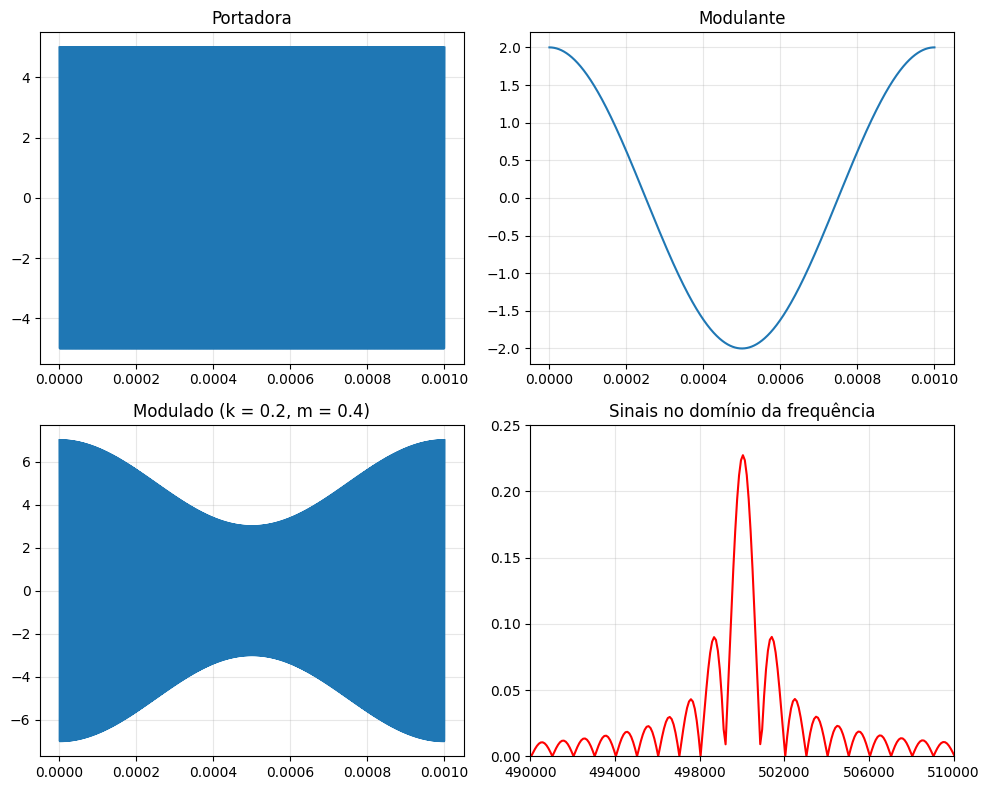

In [29]:
# Plotting
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.plot(t, ct)
plt.title('Portadora')
plt.grid(alpha=0.3)

plt.subplot(2, 2, 2)
plt.plot(t, mt)
plt.title('Modulante')
plt.grid(alpha=0.3)

plt.subplot(2, 2, 3)
plt.plot(t, st)
plt.title(f'Modulado (k = {k}, m = {Am / Ac})')
plt.grid(alpha=0.3)

plt.subplot(2, 2, 4)
lower_frequency = Fc - (Fm * 10.0)
upper_frequency = Fc + (Fm * 10.0)
plot_fft(Ts, st, lower_frequency, upper_frequency, 'r')
plt.title('Sinais no domínio da frequência')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Resoluções

---

## Qual é a frequência da onda modulada?

AM-DSB (Double Side Band) gera um sinal cuja frequência central é a frequência da portadora:

$$
f_{\text{onda modulada}} = f_c = 500 \text{ kHz}
$$

E bandas laterais nas frequências:

$$
f_c + f_m = 501 \text{ kHz} \quad \text{(banda lateral superior)}
$$
$$
f_c - f_m = 499 \text{ kHz} \quad \text{(banda lateral inferior)}
$$

### Resposta:
  - Frequência central da onda modulada: $500 \text{ kHz}$
  - Bandas laterais em: $499 \text{ kHz}$ e $501 \text{ kHz}$

---

## Qual é a amplitude máxima da onda modulada?

O sinal modulado é:

$$
s(t) = (A_c + k A_m) \cdot \cos(2 \pi f_c t)
$$

Dado $k = 1/A_c$ e que $A_m$ é o valor máximo do sinal modulante. A amplitude máxima do sinal modulado será:

$$
A_{\text{max}} = A_c (1 + m)
$$

Onde o índice de modulação $m$ é:

$$
m = \frac{A_m}{A_c}
$$

Substituindo:

$$
A_{\text{max}} = 5 \times \left(1 + \frac{2}{5}\right) = 5 \times 1.4 = 7 \text{ V}
$$

### Resposta
  - Amplitude máxima da onda modulada: $7 \text{ V}$

---

## Calcule o índice de modulação.

Índice de modulação $m$ (em AM-DSB) é:

$$
m = \frac{A_m}{A_c} = \frac{2}{5} = 0.4
$$

### Resposta:
  - Índice de modulação: $0.4$ ou $40\%$

---

## Determine a potência do sinal modulante e do sinal modulado, considerando que ambos têm uma resistência de carga de $50 \Omega$.

### Sinal modulante:

A potência eficaz (RMS) é:

$$
P_m = \frac{A_m^2}{2R_L}
$$

Substituindo:

$$
P_m = \frac{2^2}{2 \times 50} = \frac{4}{100} = 0.04 \text{ W} = 40 \text{ mW}
$$

### Sinal modulado:

A potência do sinal AM-DSB é:

$$
P_s = \frac{A_c^2}{2R_L} \left(1 + \frac{m^2}{2}\right)
$$

Substituindo:

$$
P_s = \frac{5^2}{2 \times 50} \left(1 + \frac{0.4^2}{2}\right)
$$
$$
P_s = \frac{25}{100} \left(1 + \frac{0.16}{2}\right) = 0.25 \times (1 + 0.08) = 0.25 \times 1.08 = 0.27 \text{ W} = 270 \text{ mW}
$$

### Resposta
  - Potência sinal modulante $40 \text{ mW}$
  - Potência sinal modulado $270 \text{ mW}$